In [1]:
import pandas as pd

In [2]:
passageiros = pd.read_csv('Data/passageiros.csv')

In [3]:
passageiros.head()

,tempo,nPassageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


In [4]:
import seaborn as sns

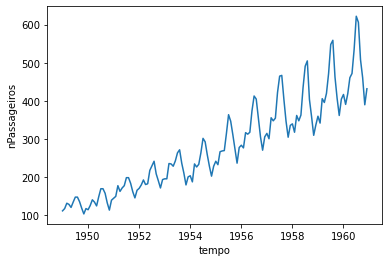

In [5]:
sns.lineplot(x='tempo', y='nPassageiros', data=passageiros)

In [6]:
Tempo = passageiros.iloc[:, :-1].values
nPassageiros = passageiros.iloc[:,1].values

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
Tempo_treino, Tempo_teste, nPassageiros_treino, nPassageiros_teste = train_test_split(Tempo, nPassageiros, test_size = 0.3)

In [9]:
from sklearn import linear_model

In [10]:
regressor = linear_model.LinearRegression()

In [11]:
regressor.fit(Tempo_treino, nPassageiros_treino)

LinearRegression()

In [12]:
nPassageiros_predito = regressor.predict(Tempo_teste)

In [13]:
import numpy as np

In [14]:
passageiros_predito = pd.DataFrame({'Tempo': np.ndarray.flatten(Tempo_teste),
                                   'nPassageiros': nPassageiros_predito})

In [15]:
passageiros_teste = pd.DataFrame({'Tempo': np.ndarray.flatten(Tempo_teste),
                                   'nPassageiros': nPassageiros_teste})

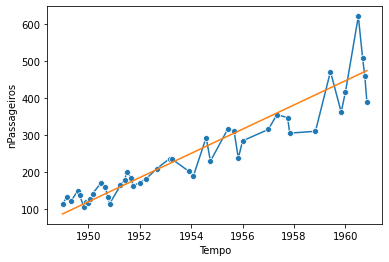

In [16]:
sns.lineplot(x='Tempo', y='nPassageiros', data=passageiros_teste, marker='o')
sns.lineplot(x='Tempo', y='nPassageiros', data=passageiros_predito)

In [17]:
regressor.coef_

array([32.84679119])

In [18]:
regressor.intercept_

-63932.524028164386

In [19]:
from sklearn.metrics import r2_score

In [20]:
r2_score(nPassageiros_teste, nPassageiros_predito)

0.8674915250460498

In [21]:
from sklearn.svm import SVR

In [22]:
regressor_svr = SVR(C=10000000)

In [23]:
regressor_svr.fit(Tempo_treino, nPassageiros_treino)

SVR(C=10000000)

In [24]:
nPassageiros_predito_svr = regressor_svr.predict(Tempo_teste)

In [25]:
passageiros_predito_svr = pd.DataFrame({'Tempo': np.ndarray.flatten(Tempo_teste),
                                   'nPassageiros': nPassageiros_predito_svr})

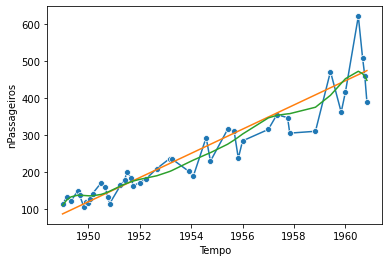

In [26]:
sns.lineplot(x='Tempo', y='nPassageiros', data=passageiros_teste, marker='o')
sns.lineplot(x='Tempo', y='nPassageiros', data=passageiros_predito)
sns.lineplot(x='Tempo', y='nPassageiros', data=passageiros_predito_svr)

In [27]:
r2_score(nPassageiros_teste, nPassageiros_predito_svr)

0.8973887017868089

In [28]:
r2_score(nPassageiros_teste, nPassageiros_predito)

0.8674915250460498

In [29]:
celular = pd.read_csv('Data/Celular.csv', delimiter=',')

In [30]:
celular.head()

,salario,economias,idade,dividas,plano
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


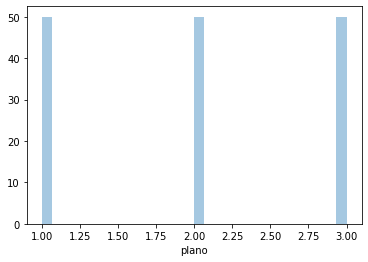

In [31]:
sns.distplot(celular['plano'], bins=30, kde=False)

In [32]:
x = celular.iloc[:, :-1].values
y = celular.iloc[:, 4].values

In [33]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3)

In [34]:
from sklearn import tree

In [35]:
classificador_arvore = tree.DecisionTreeClassifier()

In [36]:
classificador_arvore.fit(x_treino, y_treino)

DecisionTreeClassifier()

In [37]:
!pip install graphviz

In [38]:
import graphviz

In [39]:
dot_data = tree.export_graphviz(classificador_arvore, filled=True, out_file=None)

In [40]:
graph = graphviz.Source(dot_data)

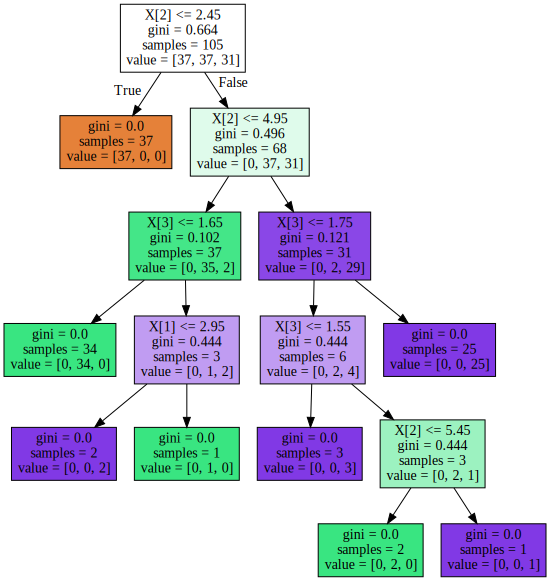

In [41]:
graph

In [42]:
plano_previsto = classificador_arvore.predict(x_teste)

In [43]:
plano_previsto

array([2, 2, 2, 1, 1, 3, 2, 1, 1, 2, 3, 2, 3, 2, 3, 3, 3, 3, 1, 3, 3, 2,
       3, 2, 3, 1, 2, 1, 1, 1, 1, 3, 2, 2, 2, 1, 3, 2, 3, 3, 3, 3, 1, 2,
       1], dtype=int64)

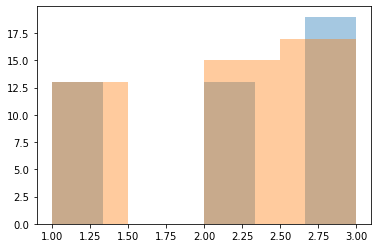

In [45]:
sns.distplot(y_teste, bins=6, kde=False)
sns.distplot(plano_previsto, bins=4, kde=False)

In [46]:
from sklearn.metrics import accuracy_score

In [47]:
accuracy_score(y_teste, plano_previsto)*100

95.55555555555556

In [48]:
from sklearn.neighbors import KNeighborsClassifier

In [49]:
classificador_vizinho = KNeighborsClassifier(5)

In [50]:
classificador_vizinho.fit(x_treino, y_treino)

KNeighborsClassifier()

In [52]:
plano_previsto_v = classificador_vizinho.predict(x_teste)

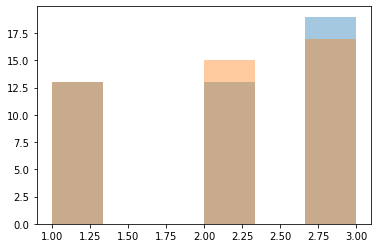

In [53]:
sns.distplot(y_teste, bins=6, kde=False)
sns.distplot(plano_previsto_v, bins=6, kde=False)

In [54]:
accuracy_score(y_teste, plano_previsto_v)*100

95.55555555555556

In [55]:
plano_previsto_v2 = classificador_vizinho.predict(x_treino)

In [56]:
accuracy_score(y_treino, plano_previsto_v2)*100

95.23809523809523

In [57]:
from sklearn.model_selection import RepeatedStratifiedKFold

In [60]:
skfold = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=0)

In [61]:
from sklearn.model_selection import GridSearchCV

In [63]:
params = {'n_neighbors': [5]}

In [64]:
gs = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=params,
                  cv=skfold, verbose=1, scoring='accuracy', return_train_score=True)

In [65]:
 gs.fit(x,y)

Fitting 100 folds for each of 1 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=10, random_state=0),
             estimator=KNeighborsClassifier(), param_grid={'n_neighbors': [5]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [66]:
gs.cv_results_['mean_test_score']

array([0.964])

In [67]:
engajamento = pd.read_csv('Data/Engajamento.csv')

In [68]:
engajamento.head()

,Horas,Taxa de Cliques,Classe
0,1007.084589,1.582099,1
1,1005.886193,1.524809,1
2,1005.609471,0.846857,1
3,989.814354,2.841944,2
4,995.328807,3.569900,3


In [69]:
X = engajamento.iloc[:, :-1]

In [70]:
X.head()

,Horas,Taxa de Cliques
0,1007.084589,1.582099
1,1005.886193,1.524809
2,1005.609471,0.846857
3,989.814354,2.841944
4,995.328807,3.569900


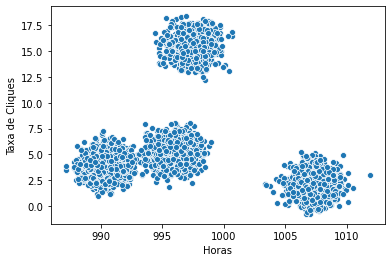

In [71]:
sns.scatterplot(x='Horas', y='Taxa de Cliques', data=X)

In [72]:
from sklearn.cluster import KMeans

In [73]:
kmeans = KMeans(n_clusters=2, random_state=0)

In [74]:
kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

In [75]:
kmeans.labels_

array([0, 0, 0, ..., 1, 1, 1])

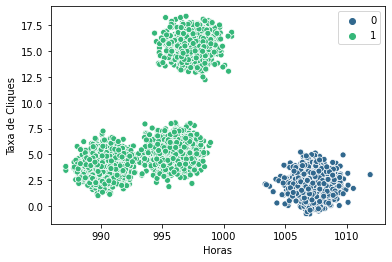

In [76]:
sns.scatterplot(x='Horas', y='Taxa de Cliques', data=X, hue=kmeans.labels_,
               palette='viridis')

In [77]:
kmeans = KMeans(n_clusters=4, random_state=0)

In [78]:
kmeans.fit(X)

KMeans(n_clusters=4, random_state=0)

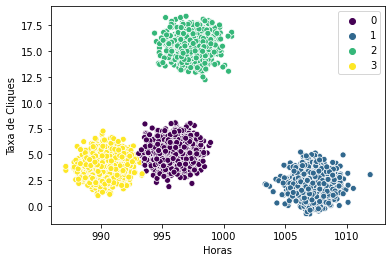

In [79]:
sns.scatterplot(x='Horas', y='Taxa de Cliques', data=X, hue=kmeans.labels_,
               palette='viridis')

In [80]:
from sklearn.cluster import OPTICS

In [85]:
clustering_o = OPTICS(min_samples=800).fit(X)

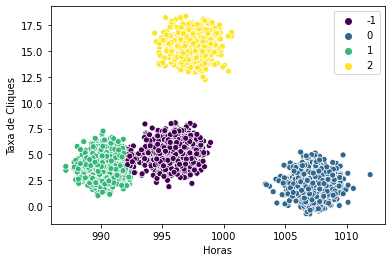

In [86]:
sns.scatterplot(x='Horas', y='Taxa de Cliques', data=X, 
                hue=clustering_o.labels_, palette='viridis')

In [88]:
from sklearn import metrics

In [90]:
Classe_conhecida = engajamento['Classe']
Classe_estimada = clustering_o.labels_

In [91]:
metrics.adjusted_rand_score(Classe_conhecida, Classe_estimada)

0.9821047486293407

In [92]:
Classe_estimada = kmeans.labels_

In [93]:
metrics.adjusted_rand_score(Classe_conhecida, Classe_estimada)

0.9957444328155858

In [94]:
metrics.silhouette_score(X, kmeans.labels_, metric='euclidean')

0.7640009351490763

In [95]:
metrics.silhouette_score(X, clustering_o.labels_, metric='euclidean')

0.7590075270703337